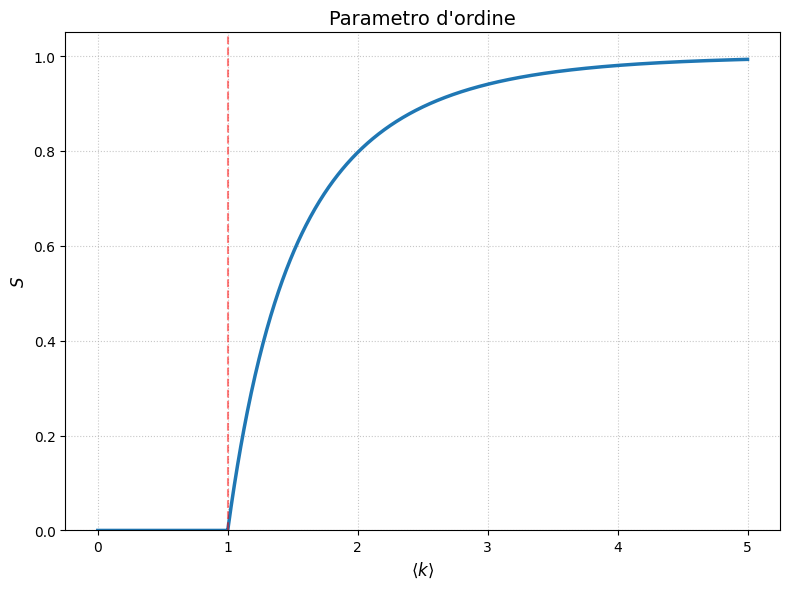

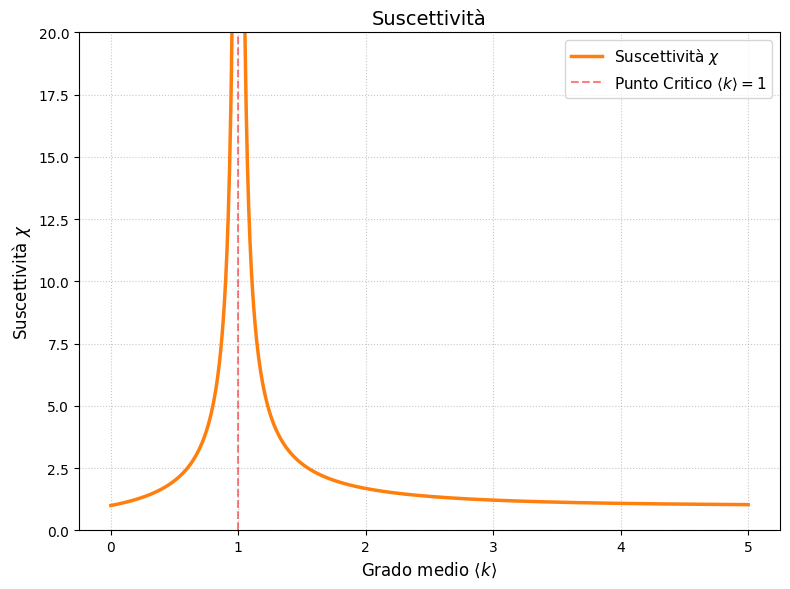

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def theoretical_S_chi(k_mean):
    """
    Calcola S (dimensione del cluster gigante) e chi (suscettività)
    in funzione del grado medio k_mean.
    """
    # Gestione esplicita della divergenza al punto critico
    if np.isclose(k_mean, 1.0):
        return 0.0, np.inf

    if k_mean < 1.0:
        # Regime subcritico
        S = 0.0
        chi = 1.0 / (1.0 - k_mean)
    else:
        # Regime supercritico
        func = lambda x: x - 1 + np.exp(-k_mean * x)
        S = fsolve(func, x0=0.5)[0]
        chi = 1.0 / (1.0 - k_mean + k_mean * S)

    return S, chi

# 1. Array dei gradi medi
k_theory = np.linspace(0, 5, 1000)

# 2. Calcolo dei valori
S_theory = []
chi_theory = []

for k in k_theory:
    S, chi = theoretical_S_chi(k)
    S_theory.append(S)
    chi_theory.append(chi)

# --- PRIMO GRAFICO: Parametro d'ordine S ---
fig1, ax1 = plt.subplots(figsize=(8, 6)) # Creiamo una figura separata per S
ax1.plot(k_theory, S_theory, color='tab:blue', linewidth=2.5)
ax1.axvline(x=1.0, color='red', linestyle='--', alpha=0.5)
ax1.set_xlabel(r"$\langle k \rangle$", fontsize=12) # Aggiungi etichetta x per il primo grafico
ax1.set_ylabel(r'$S$', fontsize=12)
ax1.set_title("Parametro d'ordine", fontsize=14)
ax1.set_ylim(0, 1.05)
ax1.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# --- SECONDO GRAFICO: Suscettività chi ---
fig2, ax2 = plt.subplots(figsize=(8, 6)) # Creiamo una figura separata per chi
ax2.plot(k_theory, chi_theory, color='tab:orange', linewidth=2.5, label=r"Suscettività $\chi$")
ax2.axvline(x=1.0, color='red', linestyle='--', alpha=0.5, label=r"Punto Critico $\langle k \rangle = 1$")
ax2.set_xlabel(r"Grado medio $\langle k \rangle$", fontsize=12)
ax2.set_ylabel(r"Suscettività $\chi$", fontsize=12)
ax2.set_title('Suscettività', fontsize=14)
ax2.set_ylim(0, 20)
ax2.grid(True, linestyle=':', alpha=0.7)
ax2.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()